In [5]:
import numpy as np
import sklearn
from sklearn.linear_model import LassoCV


In [8]:
X = np.array([[1, 2, 3.1], [2.3, 5.4, 4.3]]).T
y = np.array([1, 2, 3.1])
# Use lasso_path to compute a coefficient path
_, coef_path, _ = lasso_path(X, y, alphas=[5., 1., .5])
print(coef_path)

NameError: name 'lasso_path' is not defined

In [32]:
import numpy as np
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.linear_model import LassoCV

X = np.random.randn(20, 10)
y = np.random.randn(len(X))

cv_outer = KFold(len(X), n_folds=20)
lasso = LassoCV(cv=3)  # cv=3 makes a KFold inner splitting with 3 folds

scores = cross_val_score(lasso, X, y, cv=cv_outer)

In [65]:
# Author: Olivier Grisel, Gael Varoquaux, Alexandre Gramfort
# License: BSD 3 clause

import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

rng = np.random.RandomState(42)
X = np.c_[X, rng.randn(X.shape[0], 14)]  # add some bad features

# normalize data as done by Lars to allow for comparison
X /= np.sqrt(np.sum(X ** 2, axis=0))

Computing regularization path using the coordinate descent lasso...


(2300, 3800)

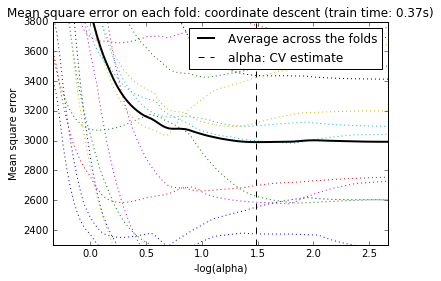

In [67]:
##############################################################################
# LassoCV: coordinate descent

# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=20).fit(X, y)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 2300, 3800
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

Computing regularization path using the Lars lasso...


//anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: divide by zero encountered in log10


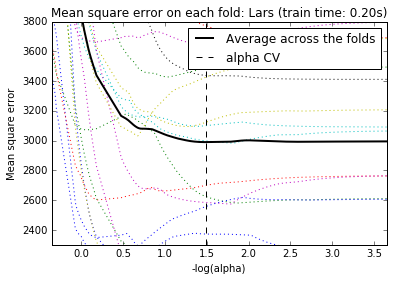

In [68]:
##############################################################################
## LassoLarsCV: least angle regression
# Converges Faster

# Compute paths
print("Computing regularization path using the Lars lasso...")
t1 = time.time()
model = LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.cv_alphas_)

plt.figure()
plt.plot(m_log_alphas, model.cv_mse_path_, ':')
plt.plot(m_log_alphas, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)

plt.show()

In [73]:
model.get_params()

{'copy_X': True,
 'cv': 20,
 'eps': 2.2204460492503131e-16,
 'fit_intercept': True,
 'max_iter': 500,
 'max_n_alphas': 1000,
 'n_jobs': 1,
 'normalize': True,
 'positive': False,
 'precompute': 'auto',
 'verbose': False}

In [75]:
print( model.coef_ )
print( model.intercept_ )

[   0.         -217.53737874  525.7068334   299.79599097 -112.33829458
    0.         -244.45083874    0.          497.66009565   87.91659553
  -15.2825558   -42.78911938   34.84457547  -63.68361654  -52.19249918
   50.18926885   30.04664282  -63.80163384  -30.17796157   72.63780064
   61.64153314   47.36646391  119.01643045   41.84632122]
151.200001606


In [76]:
model.predict(X[0])

//anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 197.09068645])

In [79]:
# Verify Linear Model
sum( X[0] * model.coef_ ) + model.intercept_

197.0906864491875